
## <span style='color:darkcyan'> Dataset url: https://archive.ics.uci.edu/ml/datasets/car+evaluation </span>

Data Set Information:

<br>
Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:
<br>
car acceptability
<br>
overall price
<br>
buying price
<br>
maint price of the maintenance
 <br>
technical characteristics
<br>
comfort
<br>
number of doors
<br>
persons capacity in terms of persons to carry
<br>
size of luggage boot
<br>
safety of the car


## <span style='color:darkcyan'> 1. Importing libraries </span>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
start = time.time()

## <span style='color:darkcyan'> 2. Importing data</span>

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
file = pd.read_csv(url)
file.columns = ['Price', 'Maintenance', 'No. of Doors', 'Capacity', 'Luggage Boot size', 'safety', 'Decision']

## <span style='color:darkcyan'> 3. Reading data</span>

In [3]:
file.shape

(1727, 7)

In [4]:
file.head()

,Price,Maintenance,No. of Doors,Capacity,Luggage Boot size,safety,Decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              1727 non-null   object
 1   Maintenance        1727 non-null   object
 2   No. of Doors       1727 non-null   object
 3   Capacity           1727 non-null   object
 4   Luggage Boot size  1727 non-null   object
 5   safety             1727 non-null   object
 6   Decision           1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
file.describe()

,Price,Maintenance,No. of Doors,Capacity,Luggage Boot size,safety,Decision
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,med,med,5more,more,big,med,unacc
freq,432,432,432,576,576,576,1209


### <span style='color:darkcyan'> 3.2. Check for missing values</span>

In [7]:
#check if there are any missing values
file.isna().sum()

Price                0
Maintenance          0
No. of Doors         0
Capacity             0
Luggage Boot size    0
safety               0
Decision             0
dtype: int64

In [8]:
file.isna()

,Price,Maintenance,No. of Doors,Capacity,Luggage Boot size,safety,Decision
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1722,False,False,False,False,False,False,False
1723,False,False,False,False,False,False,False
1724,False,False,False,False,False,False,False
1725,False,False,False,False,False,False,False


In [9]:
file.sample(5)

,Price,Maintenance,No. of Doors,Capacity,Luggage Boot size,safety,Decision
1374,low,vhigh,4,more,big,med,acc
1456,low,high,3,more,big,high,vgood
632,high,high,5more,4,med,low,unacc
587,high,high,3,more,med,low,unacc
98,vhigh,vhigh,5more,more,small,low,unacc


In [10]:
file.tail()

,Price,Maintenance,No. of Doors,Capacity,Luggage Boot size,safety,Decision
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good
1726,low,low,5more,more,big,high,vgood


In [11]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Price              1727 non-null   object
 1   Maintenance        1727 non-null   object
 2   No. of Doors       1727 non-null   object
 3   Capacity           1727 non-null   object
 4   Luggage Boot size  1727 non-null   object
 5   safety             1727 non-null   object
 6   Decision           1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
file.groupby(["Price", "Decision"]).size()

Price  Decision
high   acc         108
       unacc       324
low    acc          89
       good         46
       unacc       258
       vgood        39
med    acc         115
       good         23
       unacc       268
       vgood        26
vhigh  acc          72
       unacc       359
dtype: int64

## <span style='color:darkcyan'> 4. Exploratory Data Analysis </span>

### <span style='color:darkcyan'> 4.1. number of Decisions that are acceptable, unacceptable, good and very good. </span>

/Users/tej/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


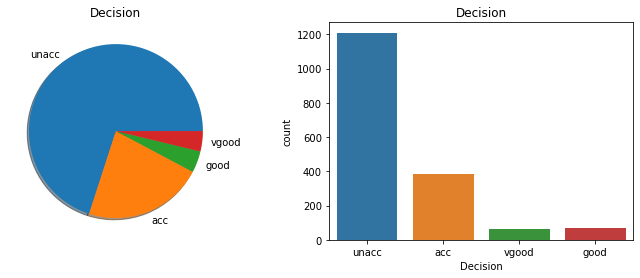

In [13]:

f,ax=plt.subplots(1,2,figsize=(12,4))

file['Decision'].value_counts().plot.pie(ax=ax[0],shadow=True)
ax[0].set_title('Decision')
ax[0].set_ylabel('')

sns.countplot('Decision',data=file,ax=ax[1])
ax[1].set_title('Decision')
plt.show()

### <span style='color:darkcyan'> 4.2. Graph for decision taken on price </span >

Text(0.5, 1.0, 'Bar graph for decision taken on price')

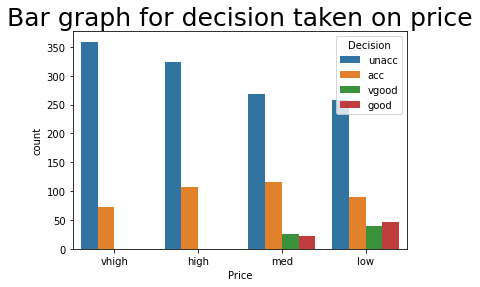

In [14]:
import seaborn as sns
sns.countplot(data=file,x='Price',hue='Decision')
plt.title('Bar graph for decision taken on price', fontsize = 25)
#plt.xlabel('Price Range in Increasing Order', fontsize = 15)
#plt.ylabel('Count', fontsize = 15)

### <span style='color:darkcyan'> 4.3. Graph for decision taken on Maintenance </span>

Text(0.5, 1.0, 'Bar graph for decision taken on Maintenance')

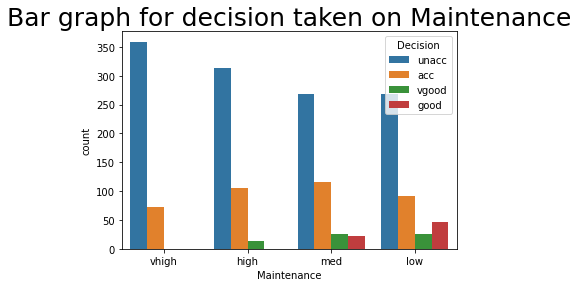

In [15]:
sns.countplot(data=file,x='Maintenance',hue='Decision')
plt.title('Bar graph for decision taken on Maintenance', fontsize = 25)

### <span style='color:darkcyan'> 4.2. Graph for decision taken on No.of Doors </span >

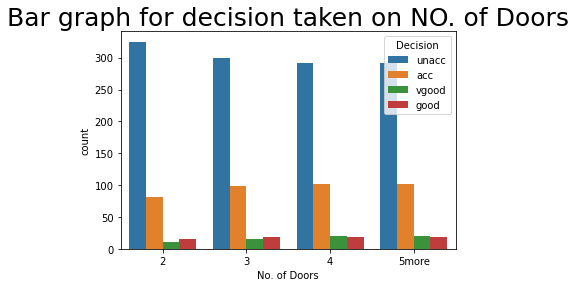

In [16]:
sns.countplot(data=file,x='No. of Doors',hue='Decision')
plt.title('Bar graph for decision taken on NO. of Doors', fontsize = 25)
plt.show()

### <span style='color:darkcyan'> 4.2. Graph for decision taken on Capacity</span>

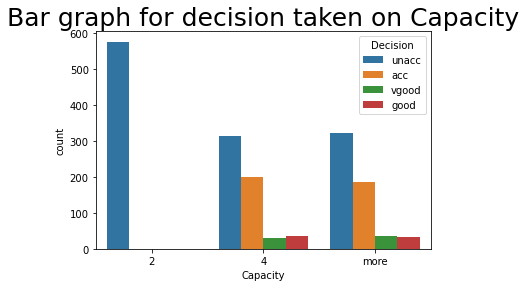

In [17]:
sns.countplot(data=file,x='Capacity',hue='Decision')
plt.title('Bar graph for decision taken on Capacity', fontsize = 25)
plt.show()

### <span style='color:darkcyan'> 4.2. Graph for decision taken on boot size </span >

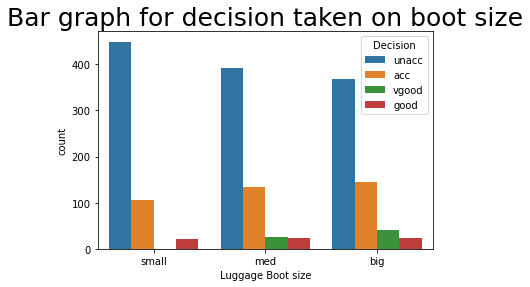

In [18]:
sns.countplot(data=file,x='Luggage Boot size',hue='Decision')
plt.title('Bar graph for decision taken on boot size', fontsize = 25)
plt.show()

### <span style='color:darkcyan'> 4.2. Graph for decision taken on safety </span >

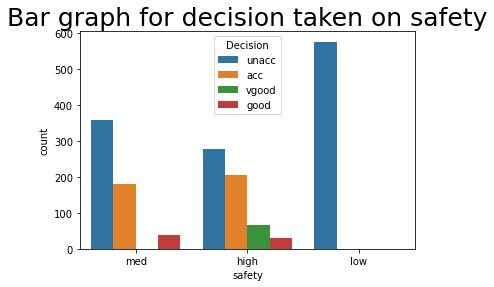

In [19]:
sns.countplot(data=file,x='safety',hue='Decision')
plt.title('Bar graph for decision taken on safety', fontsize = 25)
plt.show()

### Stopped here as I realised not a lot of visualization can be done on this dataset.